# World Happiness Report 2021

## Background

- The World Happiness Report is an annual publication produced by the the Sustainable Development Solutions Network (SDSN) and The Center for Sustainable Development at Columbia University.
- It was first produced as a reponse to a UN General Assembly 2011 Resolution which invited national governments to “give more importance to happiness and well-being in determining how to achieve and measure social and economic development.” 
- Data is collected in partnership with the Gallup World Poll team
- Data sources used to develop the WHR include:
- Gallup World Poll
- World Risk Poll (Lloyd's Register Foundation)
- Covid Data Hub (Imperial College London // YouGov)

## Methodology

1. Accessed the World Happiness Report (https://worldhappiness.report/) to review methodology and types of data included
2. Downloaded dataset from Kaggle
3. The Happiness Index includes questions about perceptions about corruption, social support, healthy life expectancy, generousity, and freedom. So I sought to address the following questions:
- how do perceptions of corruptions by the public compare with expert opinions on global corruption (via Transparency International Corruption Perception Index)?
- how do these elements compare between countries with questionably lower numbers of COVID deaths and COVID cases? 
- if data is available, this analysis could be supplemented with information about levels of restriction in each country

## Datasets:
- World Happiness Report: https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021
- Transparency International Corruption Index: https://www.transparency.org/en/cpi/2020/index/nzl
- Novel Coronavirus (COVID-19) Cases and Deaths (JHU CSSE): https://github.com/CSSEGISandData/COVID-19
- World Bank Population Estimates and Projections: https://datacatalog.worldbank.org/dataset/population-estimates-and-projections


## Methods:

I mapped the country names across the different datasets. In the instances where country names differed, I mapped the following:

| Base                    | Alternative Spellings               |
|-------------------------|-------------------------------------|
| Czech Republic          | Czechia                             |
| United States           | US                                  |
| United States           | United States of America            |
| Taiwan                  | Taiwan*                             |
| Taiwan                  | Taiwan Province of China            |
| South Korea             | Korea, South                        |
| South Korea             | Korea                      |
| North Korea             | Korea, North                        |
| North Cyprus            | Turkish Republic of Northern Cyprus |
| North Cyprus            | Northern Cyprus                     |
| Ivory Coast             | Cote d'Ivoire                       |
| Hong Kong               | Hong Kong S.A.R. of China           |
| Palestinian Territories | West Bank and Gaza                  |
| Myanmar                 | Burma                               |
| Eswatini                | Swaziland                           |
| Congo (Brazzaville)     | Republic of Congo                   |
| Congo (Kinshasa)        | Democratic Republic of Congo        |
| Slovaka    | Slovak Republic                   |
| Russia     | Russian Federation       |
| Egypt  | Egypt, Arab Rep                   |
| Gambia     | Gambia, The       |

I extracted cumulative case and death data as of 31 December 2020 from Novel Coronavirus (COVID-19) Cases and Deaths (JHU CSSE) and the 2021 Corruption Perception Index (CPI) Score from Transparency International Corruption Index and added them to the a new combined file containg World Happiness Report 2021 indicators

I mapped CPI scores to WHR Perception of Corruption Scores (100-cpi_score/100) and added them to the combined file
- <i>NOTE: This is my rough mapping - not an evidence-based method to compare these scores<i>

I added World Bank 2020 Population estimates and used them, in conjuction with CCSE data, to derive cases and deaths per 100k population, as of 31 Dec 2020 (e.g. number of cases/population *100000), and added them to the combined file
- <i>NOTE: World Bank data did not include population data on Taiwan or North Cyprus. Taiwanese population data was taken from UN Population division estimates (https://population.un.org/wpp/) and North Cyprus data was taken from https://www.ticaret.gov.tr/<i>

I extracted a list of OECD countries and matched countries to their OECD status in the combined file. 
  
In the combined file, I removed data irrelevant to this analysis including:                         
- Standard error of ladder score            
- upperwhisker                                
- lowerwhisker
- Explained by: Log GDP per capita
- Explained by: Social support
- Explained by: Healthy life expectancy
- Explained by: Freedom to make life choices
- Explained by: Generosity
- Explained by: Perceptions of corruption
- Dystopia + residual  
    
####Data Notes:
- North Cyprus is only recognized by Turkey, and thus excluded from the analysis. 
- Turkmenistan was not included in the JHU CSSE because it claims no COVID-19 cases or deaths, and thus do not report. Thus, in the combined dataset, I mark it as 0 deaths and 0 cases to compare '0' reporting with perception of corruption scores in this analysis.
- North Korea was not included in the World Happiness Report
- Palestinian Territories were not included in the Transparency International Corruption Index 

## Analysis

### Setup

Import pandas and matplotlib libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

Import combined datasets

- World Happiness Report: https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021
- Transparency International Corruption Index: https://www.transparency.org/en/cpi/2020/index/nzl
- Novel Coronavirus (COVID-19) Cases and Deaths (JHU CSSE): https://github.com/CSSEGISandData/COVID-19

In [4]:
df = pd.read_csv('combined-data-summary.csv')
df = df.rename(columns={
    'Ladder score': 'score'
})
df

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,0.15,561.0,36107.0,"5,529,000",10.15,653.05,1
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,0.12,1298.0,163479.0,"5,834,000",22.25,2802.18,1
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,0.15,7645.0,452296.0,"8,633,000",88.56,5239.15,1
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,0.25,29.0,5754.0,"363,000",7.99,1585.12,1
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,0.18,11432.0,796981.0,"17,380,000",65.78,4585.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,0.59,51.0,3094.0,"2,142,000",2.38,144.44,0
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,0.40,42.0,14805.0,"2,352,000",1.79,629.46,0
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,0.46,92.0,8383.0,"12,952,000",0.71,64.72,0
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,0.76,363.0,13867.0,"14,863,000",2.44,93.30,0


In [5]:
df.head()

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,0.15,561.0,36107.0,"5,529,000",10.15,653.05,1
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,0.12,1298.0,163479.0,"5,834,000",22.25,2802.18,1
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,0.15,7645.0,452296.0,"8,633,000",88.56,5239.15,1
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,0.25,29.0,5754.0,"363,000",7.99,1585.12,1
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,0.18,11432.0,796981.0,"17,380,000",65.78,4585.62,1


### What are the 10 top happiest countries?

In [6]:
top10_happy = df.sort_values(by = 'score', ascending = False).head(10)

Text(7.554, 0.673, 'Iceland')

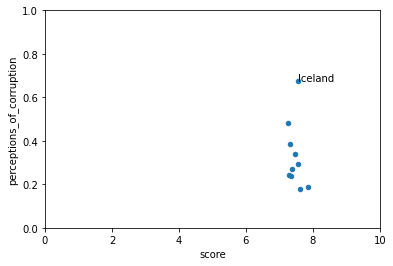

In [7]:
top10_happy.plot(kind = 'scatter', x = 'score', y = 'perceptions_of_corruption').set(xlim =(0, 10), ylim =(0, 1))
plt.annotate("Iceland", (7.554, 0.673))

In [8]:
top10_happy_corrupt = top10_happy.sort_values(by = 'perceptions_of_corruption', ascending = False).head(10)
top10_happy_corrupt

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,0.25,29.0,5754.0,"363,000",7.99,1585.12,1
9,Austria,Western Europe,7.268,10.906,0.934,73.3,0.908,0.042,0.481,0.24,6222.0,360815.0,"8,915,000",69.79,4047.28,1
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.6,0.907,-0.034,0.386,0.20,495.0,46415.0,"629,000",78.70,7379.17,1
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,0.18,11432.0,796981.0,"17,380,000",65.78,4585.62,1
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,0.15,7645.0,452296.0,"8,633,000",88.56,5239.15,1
5,Norway,Western Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270,0.16,436.0,49567.0,"5,391,000",8.09,919.44,1
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242,0.12,25.0,2162.0,"5,018,000",0.50,43.08,1
6,Sweden,Western Europe,7.363,10.867,0.934,72.7,0.945,0.086,0.237,0.15,8727.0,437379.0,"10,340,000",84.40,4229.97,1
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,0.15,561.0,36107.0,"5,529,000",10.15,653.05,1
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,0.12,1298.0,163479.0,"5,834,000",22.25,2802.18,1


Text(0.25, 0.673, 'Iceland')

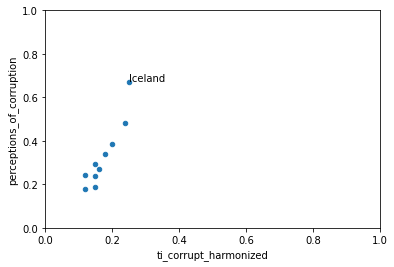

In [9]:
top10_happy_corrupt.plot(kind = 'scatter', x = 'ti_corrupt_harmonized', y = 'perceptions_of_corruption').set(xlim =(0, 1), ylim =(0, 1))
plt.annotate("Iceland", (0.25, 0.673))

##### Both the Iceland public and governance experts agree that Iceland is the most corrupt of the Top 10. Why?

https://www.aljazeera.com/news/2019/12/1/exclusive-corruption-in-namibias-fishing-industry-unveiled
https://www.transparency.org/en/blog/a-wake-up-call-in-reykjav%C3%ADk

Transparency International: "Contrary to its CPI score, Iceland (75) and its reputation as a corruption-free country took a nosedive as revelations came to light that incriminated the country’s governing elite and its national companies. For example, the 2008 financial crisis exposed shady banks, the Panama Papers implicated the country’s former Prime Minister and the Fishrot Files revealed how far the country’s biggest fishery would go to extend its business and launder suspicious proceeds. Iceland’s foreign bribery problem is also a big issue. Last month, the OECD published a new report harshly criticizing the country’s enforcement efforts." (Source: Transparency International)

##### How does its corruption score compare with the rest of Western Europe?

In [10]:
df.region.value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: region, dtype: int64

In [11]:
w_europe = df[df.region == 'Western Europe']

w_europe.sort_values(by = 'perceptions_of_corruption')

#lower corruption perception values = less (perceived) corruption

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,0.12,1298.0,163479.0,"5,834,000",22.25,2802.18,1
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,0.15,561.0,36107.0,"5,529,000",10.15,653.05,1
6,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237,0.15,8727.0,437379.0,"10,340,000",84.40,4229.97,1
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270,0.16,436.0,49567.0,"5,391,000",8.09,919.44,1
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,0.15,7645.0,452296.0,"8,633,000",88.56,5239.15,1
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,0.18,11432.0,796981.0,"17,380,000",65.78,4585.62,1
14,Ireland,Western Europe,7.085,11.342,0.947,72.400,0.879,0.077,0.363,0.28,2237.0,91779.0,"4,983,000",44.89,1841.84,1
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.600,0.907,-0.034,0.386,0.20,495.0,46415.0,"629,000",78.70,7379.17,1
16,United Kingdom,Western Europe,7.064,10.707,0.934,72.500,0.859,0.233,0.459,0.23,73512.0,2488780.0,"67,158,000",109.46,3705.86,1
12,Germany,Western Europe,7.155,10.873,0.903,72.500,0.875,0.011,0.460,0.20,33791.0,1760520.0,"83,152,000",40.64,2117.23,1


In [12]:
w_europe.sort_values(by = 'perceptions_of_corruption').tail(6)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,0.25,29.0,5754.0,"363,000",7.99,1585.12,1
26,Spain,Western Europe,6.491,10.571,0.932,74.700,0.761,-0.081,0.745,0.38,50837.0,1928265.0,"47,133,000",107.86,4091.11,1
67,Greece,Western Europe,5.723,10.279,0.823,72.600,0.582,-0.288,0.823,0.50,4838.0,138850.0,"10,658,000",45.39,1302.78,1
38,Cyprus,Western Europe,6.223,10.576,0.802,73.898,0.763,-0.015,0.844,0.43,119.0,22019.0,"1,207,000",9.86,1824.28,0
27,Italy,Western Europe,6.483,10.623,0.880,73.800,0.693,-0.084,0.866,0.47,74159.0,2107166.0,"60,177,000",123.23,3501.61,1
57,Portugal,Western Europe,5.929,10.421,0.879,72.600,0.892,-0.244,0.887,0.39,6906.0,413678.0,"10,254,000",67.35,4034.31,1


Text(0.25, 0.673, 'Iceland')

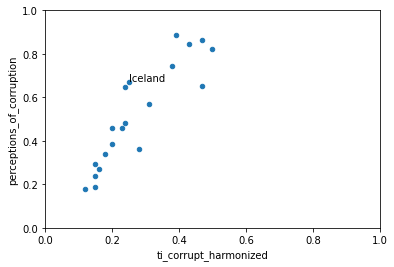

In [13]:
#Iceland is at the bottom of the Western Europe pack

w_europe.plot(kind = 'scatter', x = 'ti_corrupt_harmonized', y = 'perceptions_of_corruption').set(xlim =(0, 1), ylim =(0, 1))
plt.annotate("Iceland", (0.25, 0.673))

###### How does its corruption score compare with the rest of the OECD?

In [14]:
oecd = df[df.oecd == 1]

oecd.sort_values(by = 'perceptions_of_corruption', ascending = False)



,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911,0.51,2138.0,179543.0,"5,456,000",39.19,3290.74,1
57,Portugal,Western Europe,5.929,10.421,0.879,72.600,0.892,-0.244,0.887,0.39,6906.0,413678.0,"10,254,000",67.35,4034.31,1
52,Hungary,Central and Eastern Europe,5.992,10.358,0.943,68.000,0.755,-0.186,0.876,0.56,9537.0,322514.0,"9,743,000",97.89,3310.21,1
17,Czech Republic,Central and Eastern Europe,6.965,10.556,0.947,70.807,0.858,-0.208,0.868,0.46,11580.0,718661.0,"10,690,000",108.33,6722.74,1
27,Italy,Western Europe,6.483,10.623,0.880,73.800,0.693,-0.084,0.866,0.47,74159.0,2107166.0,"60,177,000",123.23,3501.61,1
51,Colombia,Latin America and Caribbean,6.012,9.557,0.847,68.001,0.837,-0.135,0.841,0.61,43213.0,1642775.0,"50,883,000",84.93,3228.53,1
42,Chile,Latin America and Caribbean,6.172,10.071,0.882,70.000,0.742,-0.044,0.830,0.33,16608.0,608973.0,"19,116,000",86.88,3185.67,1
37,Lithuania,Central and Eastern Europe,6.255,10.499,0.935,67.906,0.773,-0.203,0.826,0.40,1796.0,141955.0,"2,760,000",65.07,5143.30,1
67,Greece,Western Europe,5.723,10.279,0.823,72.600,0.582,-0.288,0.823,0.50,4838.0,138850.0,"10,658,000",45.39,1302.78,1
28,Slovenia,Central and Eastern Europe,6.461,10.529,0.948,71.400,0.949,-0.101,0.806,0.40,2697.0,122152.0,"2,088,000",129.17,5850.19,1


In [15]:
oecd_corrupt = oecd[['country', 'region','perceptions_of_corruption', 'ti_corrupt_harmonized']]
oecd_corrupt.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,perceptions_of_corruption,ti_corrupt_harmonized
33,Slovakia,Central and Eastern Europe,0.911,0.51
57,Portugal,Western Europe,0.887,0.39
52,Hungary,Central and Eastern Europe,0.876,0.56
17,Czech Republic,Central and Eastern Europe,0.868,0.46
27,Italy,Western Europe,0.866,0.47
51,Colombia,Latin America and Caribbean,0.841,0.61
42,Chile,Latin America and Caribbean,0.830,0.33
37,Lithuania,Central and Eastern Europe,0.826,0.40
67,Greece,Western Europe,0.823,0.50
28,Slovenia,Central and Eastern Europe,0.806,0.40


###### Among OECD countries, perceptions of corruptions are middle of the road. More residents of Southern European and Eastern European countries think their governments are corrupt.

Text(0.25, 0.673, 'Iceland')

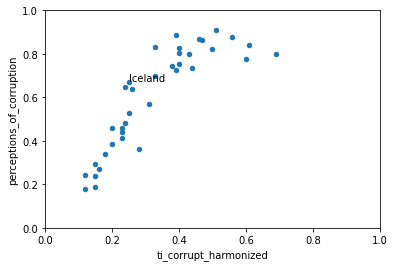

In [16]:
oecd_corrupt.plot(kind = 'scatter', x = 'ti_corrupt_harmonized', y = 'perceptions_of_corruption').set(xlim =(0, 1), ylim =(0, 1))
plt.annotate("Iceland", (0.25, 0.673))

Text(10.878, 0.25, 'Iceland')

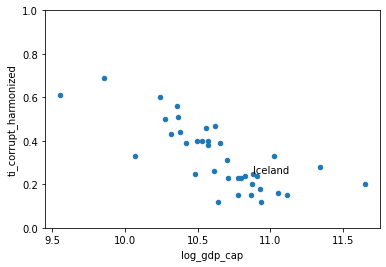

In [17]:
oecd.plot(kind = 'scatter', y = 'ti_corrupt_harmonized', x = 'log_gdp_cap').set(ylim =(0, 1))
plt.annotate("Iceland", (10.878, 0.25))

What about other regions? Who is the happiest? Who is perceived to be corrupt?

In [18]:
df.region.value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: region, dtype: int64

In [19]:
# Let's create regional dataframes
ssa = df[df.region == 'Sub-Saharan Africa']
cee = df[df.region == 'Central and Eastern Europe']
lac = df[df.region == 'Latin America and Caribbean']
mena = df[df.region == 'Middle East and North Africa']
cis = df[df.region == 'Commonwealth of Independent States']
sea = df[df.region == 'Southeast Asia']
sa = df[df.region == 'South Asia']
ea = df[df.region == 'East Asia']
naz = df[df.region == 'North America and ANZ']

In [20]:
ssa.sort_values(by = 'score', ascending = False)


,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
49,Mauritius,Sub-Saharan Africa,6.049,10.008,0.905,66.701,0.867,-0.054,0.789,0.47,10.0,527.0,"1,268,000",0.79,41.56,0
82,Congo (Brazzaville),Sub-Saharan Africa,5.342,8.117,0.636,58.221,0.695,-0.068,0.745,0.81,108.0,7107.0,"5,518,000",1.96,128.80,0
84,Ivory Coast,Sub-Saharan Africa,5.306,8.551,0.644,50.114,0.741,-0.016,0.794,0.64,137.0,22490.0,"26,378,000",0.52,85.26,0
90,Cameroon,Sub-Saharan Africa,5.142,8.189,0.710,53.515,0.731,0.026,0.848,0.75,448.0,26277.0,"26,546,000",1.69,98.99,0
91,Senegal,Sub-Saharan Africa,5.132,8.118,0.710,59.802,0.695,-0.046,0.801,0.55,410.0,19140.0,"16,744,000",2.45,114.31,0
94,Ghana,Sub-Saharan Africa,5.088,8.580,0.727,57.586,0.807,0.123,0.848,0.57,335.0,54771.0,"31,073,000",1.08,176.27,0
95,Niger,Sub-Saharan Africa,5.074,7.098,0.641,53.780,0.806,0.018,0.693,0.68,104.0,3323.0,"24,207,000",0.43,13.73,0
97,Gambia,Sub-Saharan Africa,5.051,7.686,0.690,55.160,0.697,0.424,0.746,0.63,124.0,3797.0,"2,417,000",5.13,157.10,0
98,Benin,Sub-Saharan Africa,5.045,8.087,0.489,54.713,0.757,-0.034,0.661,0.59,44.0,3251.0,"12,123,000",0.36,26.82,0
101,Guinea,Sub-Saharan Africa,4.984,7.838,0.639,55.008,0.697,0.095,0.766,0.72,81.0,13722.0,"13,133,000",0.62,104.48,0


In [21]:
ssa.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,0.59,51.0,3094.0,"2,142,000",2.38,144.44,0
115,Nigeria,Sub-Saharan Africa,4.759,8.533,0.740,50.102,0.737,0.037,0.878,0.75,1289.0,87607.0,"206,140,000",0.63,42.50,0
137,Sierra Leone,Sub-Saharan Africa,3.849,7.434,0.630,51.651,0.717,0.084,0.866,0.67,76.0,2611.0,"7,977,000",0.95,32.73,0
102,South Africa,Sub-Saharan Africa,4.956,9.403,0.860,56.904,0.749,-0.067,0.860,0.56,28469.0,1057161.0,"59,309,000",48.00,1782.46,0
118,Uganda,Sub-Saharan Africa,4.636,7.677,0.781,56.101,0.709,0.122,0.855,0.73,251.0,35216.0,"45,741,000",0.55,76.99,0
119,Liberia,Sub-Saharan Africa,4.625,7.288,0.720,56.498,0.735,0.050,0.850,0.72,83.0,1779.0,"5,058,000",1.64,35.17,0
90,Cameroon,Sub-Saharan Africa,5.142,8.189,0.710,53.515,0.731,0.026,0.848,0.75,448.0,26277.0,"26,546,000",1.69,98.99,0
94,Ghana,Sub-Saharan Africa,5.088,8.580,0.727,57.586,0.807,0.123,0.848,0.57,335.0,54771.0,"31,073,000",1.08,176.27,0
123,Namibia,Sub-Saharan Africa,4.574,9.161,0.818,56.799,0.719,-0.149,0.847,0.49,205.0,23941.0,"2,541,000",8.07,942.19,0
111,Gabon,Sub-Saharan Africa,4.852,9.603,0.776,59.962,0.731,-0.200,0.840,0.70,64.0,9571.0,"2,226,000",2.88,429.96,0


In [22]:
cee.sort_values(by = 'score', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
17,Czech Republic,Central and Eastern Europe,6.965,10.556,0.947,70.807,0.858,-0.208,0.868,0.46,11580.0,718661.0,"10,690,000",108.33,6722.74,1
28,Slovenia,Central and Eastern Europe,6.461,10.529,0.948,71.400,0.949,-0.101,0.806,0.40,2697.0,122152.0,"2,088,000",129.17,5850.19,1
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917,0.64,1332.0,51144.0,"1,795,000",74.21,2849.25,0
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911,0.51,2138.0,179543.0,"5,456,000",39.19,3290.74,1
37,Lithuania,Central and Eastern Europe,6.255,10.499,0.935,67.906,0.773,-0.203,0.826,0.40,1796.0,141955.0,"2,760,000",65.07,5143.30,1
39,Estonia,Central and Eastern Europe,6.189,10.481,0.941,68.800,0.909,-0.106,0.527,0.25,229.0,27990.0,"1,325,000",17.28,2112.45,1
43,Poland,Central and Eastern Europe,6.166,10.382,0.898,69.702,0.841,-0.165,0.735,0.44,28554.0,1294878.0,"37,914,000",75.31,3415.30,1
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938,0.56,15767.0,632263.0,"19,248,000",81.92,3284.82,0
47,Serbia,Central and Eastern Europe,6.078,9.787,0.873,68.600,0.778,0.002,0.835,0.62,3211.0,337923.0,"6,912,000",46.46,4888.93,0
50,Latvia,Central and Eastern Europe,6.032,10.315,0.927,67.100,0.715,-0.162,0.800,0.43,635.0,40904.0,"1,894,000",33.53,2159.66,1


In [23]:
cee.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
59,Croatia,Central and Eastern Europe,5.882,10.217,0.924,70.799,0.754,-0.118,0.939,0.53,3920.0,210837.0,"4,041,000",97.01,5217.45,0
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938,0.56,15767.0,632263.0,"19,248,000",81.92,3284.82,0
87,Bulgaria,Central and Eastern Europe,5.266,10.016,0.931,67.000,0.788,-0.096,0.932,0.56,7576.0,202266.0,"6,923,000",109.43,2921.65,0
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,9.590,0.870,68.098,0.706,0.113,0.931,0.65,4050.0,110985.0,"3,281,000",123.44,3382.66,0
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917,0.64,1332.0,51144.0,"1,795,000",74.21,2849.25,0
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911,0.51,2138.0,179543.0,"5,456,000",39.19,3290.74,1
93,North Macedonia,Central and Eastern Europe,5.101,9.693,0.805,65.474,0.751,0.038,0.905,0.65,2503.0,83329.0,"2,083,000",120.16,4000.43,0
92,Albania,Central and Eastern Europe,5.117,9.520,0.697,68.999,0.785,-0.030,0.901,0.64,1181.0,58316.0,"2,850,000",41.44,2046.18,0
52,Hungary,Central and Eastern Europe,5.992,10.358,0.943,68.000,0.755,-0.186,0.876,0.56,9537.0,322514.0,"9,743,000",97.89,3310.21,1
17,Czech Republic,Central and Eastern Europe,6.965,10.556,0.947,70.807,0.858,-0.208,0.868,0.46,11580.0,718661.0,"10,690,000",108.33,6722.74,1


In [24]:
#lower corruption perception values = less (perceived) corruption
ssa.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,0.59,51.0,3094.0,"2,142,000",2.38,144.44,0
115,Nigeria,Sub-Saharan Africa,4.759,8.533,0.740,50.102,0.737,0.037,0.878,0.75,1289.0,87607.0,"206,140,000",0.63,42.50,0
137,Sierra Leone,Sub-Saharan Africa,3.849,7.434,0.630,51.651,0.717,0.084,0.866,0.67,76.0,2611.0,"7,977,000",0.95,32.73,0
102,South Africa,Sub-Saharan Africa,4.956,9.403,0.860,56.904,0.749,-0.067,0.860,0.56,28469.0,1057161.0,"59,309,000",48.00,1782.46,0
118,Uganda,Sub-Saharan Africa,4.636,7.677,0.781,56.101,0.709,0.122,0.855,0.73,251.0,35216.0,"45,741,000",0.55,76.99,0
119,Liberia,Sub-Saharan Africa,4.625,7.288,0.720,56.498,0.735,0.050,0.850,0.72,83.0,1779.0,"5,058,000",1.64,35.17,0
90,Cameroon,Sub-Saharan Africa,5.142,8.189,0.710,53.515,0.731,0.026,0.848,0.75,448.0,26277.0,"26,546,000",1.69,98.99,0
94,Ghana,Sub-Saharan Africa,5.088,8.580,0.727,57.586,0.807,0.123,0.848,0.57,335.0,54771.0,"31,073,000",1.08,176.27,0
123,Namibia,Sub-Saharan Africa,4.574,9.161,0.818,56.799,0.719,-0.149,0.847,0.49,205.0,23941.0,"2,541,000",8.07,942.19,0
111,Gabon,Sub-Saharan Africa,4.852,9.603,0.776,59.962,0.731,-0.200,0.840,0.70,64.0,9571.0,"2,226,000",2.88,429.96,0


In [25]:
lac.sort_values(by = 'score', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
15,Costa Rica,Latin America and Caribbean,7.069,9.880,0.891,71.400,0.934,-0.126,0.809,0.43,2185.0,169321.0,"5,094,000",42.89,3323.93,0
29,Guatemala,Latin America and Caribbean,6.435,9.053,0.813,64.958,0.906,-0.038,0.775,0.75,4813.0,138012.0,"16,918,000",28.45,815.77,0
30,Uruguay,Latin America and Caribbean,6.431,9.966,0.925,69.100,0.896,-0.092,0.590,0.29,181.0,19119.0,"3,474,000",5.21,550.35,0
34,Brazil,Latin America and Caribbean,6.330,9.577,0.882,66.601,0.804,-0.071,0.756,0.62,194949.0,7675973.0,"212,559,000",91.72,3611.22,0
35,Mexico,Latin America and Caribbean,6.317,9.859,0.831,68.597,0.862,-0.147,0.799,0.69,125807.0,1426094.0,"128,933,000",97.58,1106.07,1
36,Jamaica,Latin America and Caribbean,6.309,9.186,0.877,67.500,0.890,-0.137,0.884,0.56,302.0,12827.0,"2,961,000",10.20,433.20,0
40,Panama,Latin America and Caribbean,6.180,10.350,0.896,69.652,0.872,-0.166,0.856,0.65,4022.0,246790.0,"4,315,000",93.21,5719.35,0
42,Chile,Latin America and Caribbean,6.172,10.071,0.882,70.000,0.742,-0.044,0.830,0.33,16608.0,608973.0,"19,116,000",86.88,3185.67,1
48,El Salvador,Latin America and Caribbean,6.061,9.054,0.762,66.402,0.888,-0.110,0.688,0.64,1327.0,46242.0,"6,486,000",20.46,712.95,0
51,Colombia,Latin America and Caribbean,6.012,9.557,0.847,68.001,0.837,-0.135,0.841,0.61,43213.0,1642775.0,"50,883,000",84.93,3228.53,1


In [26]:
lac.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
62,Peru,Latin America and Caribbean,5.840,9.458,0.832,68.250,0.822,-0.154,0.891,0.62,93070.0,1015137.0,"32,972,000",282.27,3078.79,0
36,Jamaica,Latin America and Caribbean,6.309,9.186,0.877,67.500,0.890,-0.137,0.884,0.56,302.0,12827.0,"2,961,000",10.20,433.20,0
70,Paraguay,Latin America and Caribbean,5.653,9.448,0.893,65.900,0.876,0.028,0.882,0.72,2262.0,107932.0,"7,133,000",31.71,1513.14,0
40,Panama,Latin America and Caribbean,6.180,10.350,0.896,69.652,0.872,-0.166,0.856,0.65,4022.0,246790.0,"4,315,000",93.21,5719.35,0
65,Ecuador,Latin America and Caribbean,5.764,9.313,0.821,68.800,0.842,-0.124,0.843,0.61,14034.0,212512.0,"17,643,000",79.54,1204.51,0
51,Colombia,Latin America and Caribbean,6.012,9.557,0.847,68.001,0.837,-0.135,0.841,0.61,43213.0,1642775.0,"50,883,000",84.93,3228.53,1
68,Bolivia,Latin America and Caribbean,5.716,9.046,0.810,63.901,0.875,-0.077,0.839,0.69,9165.0,160124.0,"11,673,000",78.51,1371.75,0
56,Argentina,Latin America and Caribbean,5.929,9.962,0.898,69.000,0.828,-0.182,0.834,0.58,43245.0,1625514.0,"45,350,000",95.36,3584.37,0
42,Chile,Latin America and Caribbean,6.172,10.071,0.882,70.000,0.742,-0.044,0.830,0.33,16608.0,608973.0,"19,116,000",86.88,3185.67,1
106,Venezuela,Latin America and Caribbean,4.892,9.073,0.861,66.700,0.615,-0.169,0.827,0.85,1028.0,113558.0,"28,436,000",3.62,399.35,0


In [27]:
mena.sort_values(by = 'score', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
11,Israel,Middle East and North Africa,7.157,10.575,0.939,73.503,0.800,0.031,0.753,0.40,3325.0,423262.0,"9,198,000",36.15,4601.67,1
21,Bahrain,Middle East and North Africa,6.647,10.669,0.862,69.495,0.925,0.089,0.722,0.58,352.0,92675.0,"1,702,000",20.68,5445.06,0
24,United Arab Emirates,Middle East and North Africa,6.561,11.085,0.844,67.333,0.932,0.074,0.589,0.29,669.0,207822.0,"9,890,000",6.76,2101.33,0
25,Saudi Arabia,Middle East and North Africa,6.494,10.743,0.891,66.603,0.877,-0.149,0.684,0.47,6223.0,362741.0,"34,814,000",17.87,1041.94,0
46,Kuwait,Middle East and North Africa,6.106,10.817,0.843,66.900,0.867,-0.104,0.736,0.58,934.0,150584.0,"4,271,000",21.87,3525.73,0
79,Libya,Middle East and North Africa,5.410,9.622,0.827,62.300,0.771,-0.087,0.667,0.83,1478.0,100277.0,"6,871,000",21.51,1459.42,0
103,Turkey,Middle East and North Africa,4.948,10.240,0.822,67.199,0.576,-0.139,0.776,0.60,20881.0,2208652.0,"84,339,000",24.76,2618.78,1
105,Morocco,Middle East and North Africa,4.918,8.903,0.560,66.208,0.774,-0.236,0.801,0.60,7388.0,439193.0,"36,911,000",20.02,1189.87,0
108,Algeria,Middle East and North Africa,4.887,9.342,0.802,66.005,0.480,-0.067,0.752,0.64,2756.0,99610.0,"43,851,000",6.28,227.16,0
110,Iraq,Middle East and North Africa,4.854,9.240,0.746,60.583,0.630,-0.053,0.875,0.79,12813.0,595291.0,"40,222,000",31.86,1480.01,0


In [28]:
mena.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
122,Lebanon,Middle East and North Africa,4.584,9.626,0.848,67.355,0.525,-0.073,0.898,0.75,1468.0,181503.0,"6,825,000",21.51,2659.38,0
110,Iraq,Middle East and North Africa,4.854,9.240,0.746,60.583,0.630,-0.053,0.875,0.79,12813.0,595291.0,"40,222,000",31.86,1480.01,0
121,Tunisia,Middle East and North Africa,4.596,9.266,0.691,67.201,0.656,-0.201,0.870,0.56,4676.0,139140.0,"11,819,000",39.56,1177.26,0
124,Palestinian Territories,Middle East and North Africa,4.517,8.485,0.826,62.250,0.653,-0.163,0.821,NaN,1400.0,138004.0,"4,800,000",29.17,2875.08,0
105,Morocco,Middle East and North Africa,4.918,8.903,0.560,66.208,0.774,-0.236,0.801,0.60,7388.0,439193.0,"36,911,000",20.02,1189.87,0
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800,0.85,610.0,2099.0,"29,826,000",2.05,7.04,0
131,Egypt,Middle East and North Africa,4.283,9.367,0.750,61.998,0.749,-0.182,0.795,0.67,7631.0,138062.0,"102,334,000",7.46,134.91,0
103,Turkey,Middle East and North Africa,4.948,10.240,0.822,67.199,0.576,-0.139,0.776,0.60,20881.0,2208652.0,"84,339,000",24.76,2618.78,1
11,Israel,Middle East and North Africa,7.157,10.575,0.939,73.503,0.800,0.031,0.753,0.40,3325.0,423262.0,"9,198,000",36.15,4601.67,1
108,Algeria,Middle East and North Africa,4.887,9.342,0.802,66.005,0.480,-0.067,0.752,0.64,2756.0,99610.0,"43,851,000",6.28,227.16,0


In [29]:
cis.sort_values(by = 'score', ascending = False)


,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
41,Uzbekistan,Commonwealth of Independent States,6.179,8.836,0.918,65.255,0.970,0.311,0.515,0.74,614.0,77060.0,"34,074,000",1.80,226.15,0
44,Kazakhstan,Commonwealth of Independent States,6.152,10.155,0.952,65.200,0.853,-0.069,0.733,0.62,2761.0,201196.0,"18,733,000",14.74,1074.02,0
64,Moldova,Commonwealth of Independent States,5.766,9.454,0.857,65.699,0.822,-0.079,0.918,0.66,2985.0,144818.0,"2,656,000",112.39,5452.48,0
66,Kyrgyzstan,Commonwealth of Independent States,5.744,8.538,0.893,64.401,0.935,0.119,0.908,0.69,1355.0,81034.0,"6,564,000",20.64,1234.52,0
74,Belarus,Commonwealth of Independent States,5.534,9.853,0.910,66.253,0.650,-0.180,0.627,0.53,1424.0,194284.0,"9,410,000",15.13,2064.65,0
75,Russia,Commonwealth of Independent States,5.477,10.189,0.903,64.703,0.718,-0.111,0.845,0.70,56271.0,3127347.0,"144,379,000",38.97,2166.07,0
77,Tajikistan,Commonwealth of Independent States,5.466,8.091,0.860,64.281,0.832,-0.056,0.553,0.75,90.0,13296.0,"9,538,000",0.94,139.40,0
85,Armenia,Commonwealth of Independent States,5.283,9.487,0.799,67.055,0.825,-0.168,0.629,0.51,2823.0,159409.0,"2,963,000",95.28,5379.99,0
89,Azerbaijan,Commonwealth of Independent States,5.171,9.569,0.836,65.656,0.814,-0.223,0.506,0.70,2641.0,218700.0,"10,113,000",26.11,2162.56,0
96,Turkmenistan,Commonwealth of Independent States,5.066,9.629,0.983,62.409,0.877,0.273,0.888,0.81,0.0,0.0,"6,031,000",0.00,0.00,0


In [30]:
cis.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
109,Ukraine,Commonwealth of Independent States,4.875,9.436,0.888,64.902,0.724,-0.011,0.924,0.67,19281.0,1086997.0,"44,119,000",43.70,2463.78,0
64,Moldova,Commonwealth of Independent States,5.766,9.454,0.857,65.699,0.822,-0.079,0.918,0.66,2985.0,144818.0,"2,656,000",112.39,5452.48,0
66,Kyrgyzstan,Commonwealth of Independent States,5.744,8.538,0.893,64.401,0.935,0.119,0.908,0.69,1355.0,81034.0,"6,564,000",20.64,1234.52,0
96,Turkmenistan,Commonwealth of Independent States,5.066,9.629,0.983,62.409,0.877,0.273,0.888,0.81,0.0,0.0,"6,031,000",0.00,0.00,0
75,Russia,Commonwealth of Independent States,5.477,10.189,0.903,64.703,0.718,-0.111,0.845,0.70,56271.0,3127347.0,"144,379,000",38.97,2166.07,0
44,Kazakhstan,Commonwealth of Independent States,6.152,10.155,0.952,65.200,0.853,-0.069,0.733,0.62,2761.0,201196.0,"18,733,000",14.74,1074.02,0
107,Georgia,Commonwealth of Independent States,4.891,9.585,0.671,64.300,0.783,-0.238,0.655,0.44,2505.0,227420.0,"3,710,000",67.52,6129.92,0
85,Armenia,Commonwealth of Independent States,5.283,9.487,0.799,67.055,0.825,-0.168,0.629,0.51,2823.0,159409.0,"2,963,000",95.28,5379.99,0
74,Belarus,Commonwealth of Independent States,5.534,9.853,0.910,66.253,0.650,-0.180,0.627,0.53,1424.0,194284.0,"9,410,000",15.13,2064.65,0
77,Tajikistan,Commonwealth of Independent States,5.466,8.091,0.860,64.281,0.832,-0.056,0.553,0.75,90.0,13296.0,"9,538,000",0.94,139.40,0


In [31]:
sea.sort_values(by = 'score', ascending = False)


,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
31,Singapore,Southeast Asia,6.377,11.488,0.915,76.953,0.927,-0.018,0.082,0.15,29.0,58599.0,"5,751,000",0.50,1018.94,0
53,Thailand,Southeast Asia,5.985,9.805,0.888,67.401,0.884,0.287,0.895,0.64,63.0,7163.0,"69,800,000",0.09,10.26,0
60,Philippines,Southeast Asia,5.880,9.076,0.830,62.000,0.917,-0.097,0.742,0.66,9244.0,474064.0,"109,581,000",8.44,432.62,0
78,Vietnam,Southeast Asia,5.411,8.973,0.850,68.034,0.940,-0.098,0.796,0.64,35.0,1465.0,"97,339,000",0.04,1.51,0
80,Malaysia,Southeast Asia,5.384,10.238,0.817,67.102,0.895,0.125,0.839,0.49,471.0,113010.0,"32,366,000",1.46,349.16,0
81,Indonesia,Southeast Asia,5.345,9.365,0.811,62.236,0.873,0.542,0.867,0.63,22138.0,743198.0,"273,524,000",8.09,271.71,0
99,Laos,Southeast Asia,5.030,8.947,0.728,58.968,0.910,0.123,0.658,0.71,0.0,41.0,"7,276,000",0.00,0.56,0
113,Cambodia,Southeast Asia,4.830,8.360,0.765,62.000,0.959,0.034,0.843,0.79,0.0,378.0,"16,719,000",0.00,2.26,0
125,Myanmar,Southeast Asia,4.426,8.541,0.779,59.302,0.876,0.509,0.660,0.72,2682.0,124630.0,"54,410,000",4.93,229.06,0


In [32]:
sea.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
53,Thailand,Southeast Asia,5.985,9.805,0.888,67.401,0.884,0.287,0.895,0.64,63.0,7163.0,"69,800,000",0.09,10.26,0
81,Indonesia,Southeast Asia,5.345,9.365,0.811,62.236,0.873,0.542,0.867,0.63,22138.0,743198.0,"273,524,000",8.09,271.71,0
113,Cambodia,Southeast Asia,4.830,8.360,0.765,62.000,0.959,0.034,0.843,0.79,0.0,378.0,"16,719,000",0.00,2.26,0
80,Malaysia,Southeast Asia,5.384,10.238,0.817,67.102,0.895,0.125,0.839,0.49,471.0,113010.0,"32,366,000",1.46,349.16,0
78,Vietnam,Southeast Asia,5.411,8.973,0.850,68.034,0.940,-0.098,0.796,0.64,35.0,1465.0,"97,339,000",0.04,1.51,0
60,Philippines,Southeast Asia,5.880,9.076,0.830,62.000,0.917,-0.097,0.742,0.66,9244.0,474064.0,"109,581,000",8.44,432.62,0
125,Myanmar,Southeast Asia,4.426,8.541,0.779,59.302,0.876,0.509,0.660,0.72,2682.0,124630.0,"54,410,000",4.93,229.06,0
99,Laos,Southeast Asia,5.030,8.947,0.728,58.968,0.910,0.123,0.658,0.71,0.0,41.0,"7,276,000",0.00,0.56,0
31,Singapore,Southeast Asia,6.377,11.488,0.915,76.953,0.927,-0.018,0.082,0.15,29.0,58599.0,"5,751,000",0.50,1018.94,0


In [33]:
ea.sort_values(by = 'score', ascending = False)


,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
23,Taiwan,East Asia,6.584,10.871,0.898,69.600,0.784,-0.070,0.721,0.35,7.0,799.0,"23,854,162",0.03,3.35,0
55,Japan,East Asia,5.940,10.611,0.884,75.100,0.796,-0.258,0.638,0.26,3292.0,235811.0,"125,769,000",2.62,187.50,1
61,South Korea,East Asia,5.845,10.651,0.799,73.900,0.672,-0.083,0.727,0.39,917.0,61769.0,"51,727,000",1.77,119.41,1
69,Mongolia,East Asia,5.677,9.400,0.935,62.500,0.708,0.116,0.856,0.65,1.0,1220.0,"3,278,000",0.03,37.22,0
76,Hong Kong,East Asia,5.477,11.000,0.836,76.820,0.717,0.067,0.403,0.23,148.0,8846.0,"7,560,000",1.96,117.01,0
83,China,East Asia,5.339,9.673,0.811,69.593,0.904,-0.146,0.755,0.58,4634.0,87117.0,"1,402,667,000",0.33,6.21,0


In [34]:
ea.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
69,Mongolia,East Asia,5.677,9.400,0.935,62.500,0.708,0.116,0.856,0.65,1.0,1220.0,"3,278,000",0.03,37.22,0
83,China,East Asia,5.339,9.673,0.811,69.593,0.904,-0.146,0.755,0.58,4634.0,87117.0,"1,402,667,000",0.33,6.21,0
61,South Korea,East Asia,5.845,10.651,0.799,73.900,0.672,-0.083,0.727,0.39,917.0,61769.0,"51,727,000",1.77,119.41,1
23,Taiwan,East Asia,6.584,10.871,0.898,69.600,0.784,-0.070,0.721,0.35,7.0,799.0,"23,854,162",0.03,3.35,0
55,Japan,East Asia,5.940,10.611,0.884,75.100,0.796,-0.258,0.638,0.26,3292.0,235811.0,"125,769,000",2.62,187.50,1
76,Hong Kong,East Asia,5.477,11.000,0.836,76.820,0.717,0.067,0.403,0.23,148.0,8846.0,"7,560,000",1.96,117.01,0


In [35]:
sa.sort_values(by = 'score', ascending = False)


,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
86,Nepal,South Asia,5.269,8.120,0.774,64.233,0.782,0.152,0.727,0.67,1856.0,260593.0,"29,137,000",6.37,894.37,0
88,Maldives,South Asia,5.198,9.826,0.913,70.600,0.854,0.024,0.825,0.57,48.0,13757.0,"541,000",8.87,2542.88,0
100,Bangladesh,South Asia,5.025,8.454,0.693,64.800,0.877,-0.041,0.682,0.74,7559.0,513510.0,"164,689,000",4.59,311.81,0
104,Pakistan,South Asia,4.934,8.458,0.651,58.709,0.726,0.098,0.787,0.69,10176.0,482178.0,"220,892,000",4.61,218.29,0
128,Sri Lanka,South Asia,4.325,9.470,0.827,67.299,0.841,0.079,0.863,0.62,204.0,43299.0,"21,898,000",0.93,197.73,0
138,India,South Asia,3.819,8.755,0.603,60.633,0.893,0.089,0.774,0.60,148738.0,10266674.0,"1,380,004,000",10.78,743.96,0
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,0.81,2191.0,51526.0,"38,928,000",5.63,132.36,0


In [36]:
sa.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,0.81,2191.0,51526.0,"38,928,000",5.63,132.36,0
128,Sri Lanka,South Asia,4.325,9.470,0.827,67.299,0.841,0.079,0.863,0.62,204.0,43299.0,"21,898,000",0.93,197.73,0
88,Maldives,South Asia,5.198,9.826,0.913,70.600,0.854,0.024,0.825,0.57,48.0,13757.0,"541,000",8.87,2542.88,0
104,Pakistan,South Asia,4.934,8.458,0.651,58.709,0.726,0.098,0.787,0.69,10176.0,482178.0,"220,892,000",4.61,218.29,0
138,India,South Asia,3.819,8.755,0.603,60.633,0.893,0.089,0.774,0.60,148738.0,10266674.0,"1,380,004,000",10.78,743.96,0
86,Nepal,South Asia,5.269,8.120,0.774,64.233,0.782,0.152,0.727,0.67,1856.0,260593.0,"29,137,000",6.37,894.37,0
100,Bangladesh,South Asia,5.025,8.454,0.693,64.800,0.877,-0.041,0.682,0.74,7559.0,513510.0,"164,689,000",4.59,311.81,0


In [37]:
naz.sort_values(by = 'score', ascending = False)


,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242,0.12,25.0,2162.0,"5,018,000",0.50,43.08,1
10,Australia,North America and ANZ,7.183,10.796,0.940,73.9,0.914,0.159,0.442,0.23,909.0,28425.0,"25,653,000",3.54,110.81,1
13,Canada,North America and ANZ,7.103,10.776,0.926,73.8,0.915,0.089,0.415,0.23,15762.0,584409.0,"37,916,000",41.57,1541.33,1
18,United States,North America and ANZ,6.951,11.023,0.920,68.2,0.837,0.098,0.698,0.33,352210.0,20100244.0,"330,139,000",106.69,6088.42,1


In [38]:
naz.sort_values(by = 'perceptions_of_corruption', ascending = False)

,country,region,score,log_gdp_cap,social_support,life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ti_corrupt_harmonized,covid_deaths,covid_cases,pop_2020,death_100k,cases_100k,oecd
18,United States,North America and ANZ,6.951,11.023,0.920,68.2,0.837,0.098,0.698,0.33,352210.0,20100244.0,"330,139,000",106.69,6088.42,1
10,Australia,North America and ANZ,7.183,10.796,0.940,73.9,0.914,0.159,0.442,0.23,909.0,28425.0,"25,653,000",3.54,110.81,1
13,Canada,North America and ANZ,7.103,10.776,0.926,73.8,0.915,0.089,0.415,0.23,15762.0,584409.0,"37,916,000",41.57,1541.33,1
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242,0.12,25.0,2162.0,"5,018,000",0.50,43.08,1


##### Is there any correlation between happiness in 2020 and covid cases or deaths?

In [39]:
correlation_cases = df[['country', 'region', 'score', 'cases_100k', 'perceptions_of_corruption', 'ti_corrupt_harmonized']]
correlation_death = df[['country', 'region', 'score', 'death_100k', 'perceptions_of_corruption', 'ti_corrupt_harmonized']]

In [40]:
correlation_cases.describe()

,score,cases_100k,perceptions_of_corruption,ti_corrupt_harmonized
count,149.000000,149.000000,149.000000,147.000000
mean,5.532839,1726.009933,0.727450,0.558367
std,1.073924,1915.327262,0.179226,0.189137
min,2.523000,0.000000,0.082000,0.120000
25%,4.852000,112.730000,0.667000,0.440000
50%,5.534000,1041.940000,0.781000,0.610000
75%,6.255000,2921.650000,0.845000,0.700000
max,7.842000,7756.750000,0.939000,0.850000


In [41]:
correlation_cases.sort_values(by = 'perceptions_of_corruption').head(10)

,country,region,score,cases_100k,perceptions_of_corruption,ti_corrupt_harmonized
31,Singapore,Southeast Asia,6.377,1018.94,0.082,0.15
146,Rwanda,Sub-Saharan Africa,3.415,64.72,0.167,0.46
1,Denmark,Western Europe,7.620,2802.18,0.179,0.12
0,Finland,Western Europe,7.842,653.05,0.186,0.15
6,Sweden,Western Europe,7.363,4229.97,0.237,0.15
8,New Zealand,North America and ANZ,7.277,43.08,0.242,0.12
5,Norway,Western Europe,7.392,919.44,0.270,0.16
2,Switzerland,Western Europe,7.571,5239.15,0.292,0.15
4,Netherlands,Western Europe,7.464,4585.62,0.338,0.18
14,Ireland,Western Europe,7.085,1841.84,0.363,0.28


In [42]:
correlation_cases.sort_values(by = 'perceptions_of_corruption').tail(10)


,country,region,score,cases_100k,perceptions_of_corruption,ti_corrupt_harmonized
33,Slovakia,Central and Eastern Europe,6.331,3290.74,0.911,0.51
144,Lesotho,Sub-Saharan Africa,3.512,144.44,0.915,0.59
32,Kosovo,Central and Eastern Europe,6.372,2849.25,0.917,0.64
64,Moldova,Commonwealth of Independent States,5.766,5452.48,0.918,0.66
109,Ukraine,Commonwealth of Independent States,4.875,2463.78,0.924,0.67
148,Afghanistan,South Asia,2.523,132.36,0.924,0.81
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,3382.66,0.931,0.65
87,Bulgaria,Central and Eastern Europe,5.266,2921.65,0.932,0.56
45,Romania,Central and Eastern Europe,6.140,3284.82,0.938,0.56
59,Croatia,Central and Eastern Europe,5.882,5217.45,0.939,0.53


In [43]:
correlation_death.sort_values(by = 'perceptions_of_corruption').head(10)

,country,region,score,death_100k,perceptions_of_corruption,ti_corrupt_harmonized
31,Singapore,Southeast Asia,6.377,0.50,0.082,0.15
146,Rwanda,Sub-Saharan Africa,3.415,0.71,0.167,0.46
1,Denmark,Western Europe,7.620,22.25,0.179,0.12
0,Finland,Western Europe,7.842,10.15,0.186,0.15
6,Sweden,Western Europe,7.363,84.40,0.237,0.15
8,New Zealand,North America and ANZ,7.277,0.50,0.242,0.12
5,Norway,Western Europe,7.392,8.09,0.270,0.16
2,Switzerland,Western Europe,7.571,88.56,0.292,0.15
4,Netherlands,Western Europe,7.464,65.78,0.338,0.18
14,Ireland,Western Europe,7.085,44.89,0.363,0.28


In [44]:
correlation_death.sort_values(by = 'perceptions_of_corruption').tail(10)

,country,region,score,death_100k,perceptions_of_corruption,ti_corrupt_harmonized
33,Slovakia,Central and Eastern Europe,6.331,39.19,0.911,0.51
144,Lesotho,Sub-Saharan Africa,3.512,2.38,0.915,0.59
32,Kosovo,Central and Eastern Europe,6.372,74.21,0.917,0.64
64,Moldova,Commonwealth of Independent States,5.766,112.39,0.918,0.66
109,Ukraine,Commonwealth of Independent States,4.875,43.70,0.924,0.67
148,Afghanistan,South Asia,2.523,5.63,0.924,0.81
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,123.44,0.931,0.65
87,Bulgaria,Central and Eastern Europe,5.266,109.43,0.932,0.56
45,Romania,Central and Eastern Europe,6.140,81.92,0.938,0.56
59,Croatia,Central and Eastern Europe,5.882,97.01,0.939,0.53


In [45]:
mean_death = df.death_100k.mean()
mean_death

33.888523489932886

In [46]:
mean_cases = df.cases_100k.mean()
mean_cases

1726.0099328859062

In [47]:
correlation_death[correlation_death['death_100k'] < mean_death]

,country,region,score,death_100k,perceptions_of_corruption,ti_corrupt_harmonized
0,Finland,Western Europe,7.842,10.15,0.186,0.15
1,Denmark,Western Europe,7.620,22.25,0.179,0.12
3,Iceland,Western Europe,7.554,7.99,0.673,0.25
5,Norway,Western Europe,7.392,8.09,0.270,0.16
8,New Zealand,North America and ANZ,7.277,0.50,0.242,0.12
...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,2.38,0.915,0.59
145,Botswana,Sub-Saharan Africa,3.467,1.79,0.801,0.40
146,Rwanda,Sub-Saharan Africa,3.415,0.71,0.167,0.46
147,Zimbabwe,Sub-Saharan Africa,3.145,2.44,0.821,0.76


In [48]:
deathrate_lmean = correlation_death[correlation_death['death_100k'] < mean_death]

In [49]:
deathrate_lmean.sort_values(by = 'death_100k').head(50)


,country,region,score,death_100k,perceptions_of_corruption,ti_corrupt_harmonized
73,North Cyprus,Western Europe,5.536,0.00,0.626,NaN
113,Cambodia,Southeast Asia,4.830,0.00,0.843,0.79
99,Laos,Southeast Asia,5.030,0.00,0.658,0.71
96,Turkmenistan,Commonwealth of Independent States,5.066,0.00,0.888,0.81
139,Burundi,Sub-Saharan Africa,3.775,0.02,0.607,0.81
23,Taiwan,East Asia,6.584,0.03,0.721,0.35
69,Mongolia,East Asia,5.677,0.03,0.856,0.65
141,Tanzania,Sub-Saharan Africa,3.623,0.04,0.577,0.62
78,Vietnam,Southeast Asia,5.411,0.04,0.796,0.64
53,Thailand,Southeast Asia,5.985,0.09,0.895,0.64


In [50]:
# New Zealand and Singapore have the lowest corruption ratings in this list...let's use New Zealand as a comparator for the analysis

How many countries are reporting less than 7 deaths per 100k with public perception corruption scores higher than average? Who are they?

In [51]:
deathrate_7 = correlation_death[(correlation_death['death_100k'] < 7) & (correlation_death.perceptions_of_corruption > correlation_death.perceptions_of_corruption.mean())]
deathrate_7.country.count()

39

In [52]:
deathrate_7

,country,region,score,death_100k,perceptions_of_corruption,ti_corrupt_harmonized
49,Mauritius,Sub-Saharan Africa,6.049,0.79,0.789,0.47
53,Thailand,Southeast Asia,5.985,0.09,0.895,0.64
69,Mongolia,East Asia,5.677,0.03,0.856,0.65
78,Vietnam,Southeast Asia,5.411,0.04,0.796,0.64
80,Malaysia,Southeast Asia,5.384,1.46,0.839,0.49
82,Congo (Brazzaville),Sub-Saharan Africa,5.342,1.96,0.745,0.81
83,China,East Asia,5.339,0.33,0.755,0.58
84,Ivory Coast,Sub-Saharan Africa,5.306,0.52,0.794,0.64
90,Cameroon,Sub-Saharan Africa,5.142,1.69,0.848,0.75
91,Senegal,Sub-Saharan Africa,5.132,2.45,0.801,0.55


How does this compare with expert opinion on corruption?

In [53]:
deathrate_7e = correlation_death[(correlation_death['death_100k'] < 7) & (correlation_death.ti_corrupt_harmonized > correlation_death.ti_corrupt_harmonized.mean())]
deathrate_7.country.count()

39

In [54]:
deathrate_7e

,country,region,score,death_100k,perceptions_of_corruption,ti_corrupt_harmonized
41,Uzbekistan,Commonwealth of Independent States,6.179,1.80,0.515,0.74
53,Thailand,Southeast Asia,5.985,0.09,0.895,0.64
54,Nicaragua,Latin America and Caribbean,5.972,2.49,0.664,0.78
69,Mongolia,East Asia,5.677,0.03,0.856,0.65
77,Tajikistan,Commonwealth of Independent States,5.466,0.94,0.553,0.75
78,Vietnam,Southeast Asia,5.411,0.04,0.796,0.64
82,Congo (Brazzaville),Sub-Saharan Africa,5.342,1.96,0.745,0.81
83,China,East Asia,5.339,0.33,0.755,0.58
84,Ivory Coast,Sub-Saharan Africa,5.306,0.52,0.794,0.64
86,Nepal,South Asia,5.269,6.37,0.727,0.67


In [55]:
# merge

In [56]:
deathrate_7c = deathrate_7.merge(deathrate_7e, on = 'country', suffixes = ('whr_', 'ti_')).sort_values(by = 'perceptions_of_corruptionwhr_', ascending = False)

In [57]:
deathrate_7c.info()
deathrate_7c['regionwhr_'].value_counts(normalize = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 34 to 31
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        35 non-null     object 
 1   regionwhr_                     35 non-null     object 
 2   scorewhr_                      35 non-null     float64
 3   death_100kwhr_                 35 non-null     float64
 4   perceptions_of_corruptionwhr_  35 non-null     float64
 5   ti_corrupt_harmonizedwhr_      35 non-null     float64
 6   regionti_                      35 non-null     object 
 7   scoreti_                       35 non-null     float64
 8   death_100kti_                  35 non-null     float64
 9   perceptions_of_corruptionti_   35 non-null     float64
 10  ti_corrupt_harmonizedti_       35 non-null     float64
dtypes: float64(8), object(3)
memory usage: 3.3+ KB


Sub-Saharan Africa                    0.657143
Southeast Asia                        0.085714
South Asia                            0.085714
Middle East and North Africa          0.057143
East Asia                             0.057143
Commonwealth of Independent States    0.028571
Latin America and Caribbean           0.028571
Name: regionwhr_, dtype: float64

65% (n=23) countries reporting less than 7 deaths/100k population and have higher than average corruption score across both public and expert opinions are in Sub-Saharan Africa.

In [58]:
deathrate_7c.sort_values(by = 'perceptions_of_corruptionwhr_', ascending = False)

,country,regionwhr_,scorewhr_,death_100kwhr_,perceptions_of_corruptionwhr_,ti_corrupt_harmonizedwhr_,regionti_,scoreti_,death_100kti_,perceptions_of_corruptionti_,ti_corrupt_harmonizedti_
34,Afghanistan,South Asia,2.523,5.63,0.924,0.81,South Asia,2.523,5.63,0.924,0.81
32,Lesotho,Sub-Saharan Africa,3.512,2.38,0.915,0.59,Sub-Saharan Africa,3.512,2.38,0.915,0.59
0,Thailand,Southeast Asia,5.985,0.09,0.895,0.64,Southeast Asia,5.985,0.09,0.895,0.64
8,Turkmenistan,Commonwealth of Independent States,5.066,0.00,0.888,0.81,Commonwealth of Independent States,5.066,0.00,0.888,0.81
17,Nigeria,Sub-Saharan Africa,4.759,0.63,0.878,0.75,Sub-Saharan Africa,4.759,0.63,0.878,0.75
29,Sierra Leone,Sub-Saharan Africa,3.849,0.95,0.866,0.67,Sub-Saharan Africa,3.849,0.95,0.866,0.67
23,Sri Lanka,South Asia,4.325,0.93,0.863,0.62,South Asia,4.325,0.93,0.863,0.62
1,Mongolia,East Asia,5.677,0.03,0.856,0.65,East Asia,5.677,0.03,0.856,0.65
19,Uganda,Sub-Saharan Africa,4.636,0.55,0.855,0.73,Sub-Saharan Africa,4.636,0.55,0.855,0.73
20,Liberia,Sub-Saharan Africa,4.625,1.64,0.850,0.72,Sub-Saharan Africa,4.625,1.64,0.850,0.72


In [59]:
caserate_lmean = correlation_cases[correlation_cases['cases_100k'] < mean_cases]
caserate_lmean.sort_values(by = 'cases_100k').head(50)

,country,region,score,cases_100k,perceptions_of_corruption,ti_corrupt_harmonized
96,Turkmenistan,Commonwealth of Independent States,5.066,0.00,0.888,0.81
73,North Cyprus,Western Europe,5.536,0.00,0.626,NaN
99,Laos,Southeast Asia,5.030,0.56,0.658,0.71
141,Tanzania,Sub-Saharan Africa,3.623,0.85,0.577,0.62
78,Vietnam,Southeast Asia,5.411,1.51,0.796,0.64
113,Cambodia,Southeast Asia,4.830,2.26,0.843,0.79
23,Taiwan,East Asia,6.584,3.35,0.721,0.35
83,China,East Asia,5.339,6.21,0.755,0.58
139,Burundi,Sub-Saharan Africa,3.775,6.88,0.607,0.81
140,Yemen,Middle East and North Africa,3.658,7.04,0.800,0.85


Again...let's use New Zealand as a comparator

How many countries are reporting less than x number of cases per 100k with public perception corruption scores higher than average? Who are they?

In [60]:
caserate_10 = correlation_cases[(correlation_cases['cases_100k'] < 10) & (correlation_cases.perceptions_of_corruption > correlation_cases.perceptions_of_corruption.mean())]
caserate_10.country.count()

5

In [61]:
caserate_10

,country,region,score,cases_100k,perceptions_of_corruption,ti_corrupt_harmonized
78,Vietnam,Southeast Asia,5.411,1.51,0.796,0.64
83,China,East Asia,5.339,6.21,0.755,0.58
96,Turkmenistan,Commonwealth of Independent States,5.066,0.00,0.888,0.81
113,Cambodia,Southeast Asia,4.830,2.26,0.843,0.79
140,Yemen,Middle East and North Africa,3.658,7.04,0.800,0.85


In [62]:
caserate_43 = correlation_cases[(correlation_cases['cases_100k'] < 43) & (correlation_cases.perceptions_of_corruption > correlation_cases.perceptions_of_corruption.mean())]
caserate_43.country.count()


15

In [63]:
caserate_43

,country,region,score,cases_100k,perceptions_of_corruption,ti_corrupt_harmonized
49,Mauritius,Sub-Saharan Africa,6.049,41.56,0.789,0.47
53,Thailand,Southeast Asia,5.985,10.26,0.895,0.64
69,Mongolia,East Asia,5.677,37.22,0.856,0.65
78,Vietnam,Southeast Asia,5.411,1.51,0.796,0.64
83,China,East Asia,5.339,6.21,0.755,0.58
96,Turkmenistan,Commonwealth of Independent States,5.066,0.00,0.888,0.81
112,Burkina Faso,Sub-Saharan Africa,4.834,32.09,0.748,0.60
113,Cambodia,Southeast Asia,4.830,2.26,0.843,0.79
115,Nigeria,Sub-Saharan Africa,4.759,42.50,0.878,0.75
116,Mali,Sub-Saharan Africa,4.723,35.01,0.827,0.70


How does this compare with expert opinions on corruption

In [64]:
caserate_43e = correlation_cases[(correlation_cases['cases_100k'] < 43) & (correlation_cases.ti_corrupt_harmonized > correlation_cases.ti_corrupt_harmonized.mean())]
caserate_43e.country.count()

19

In [65]:
caserate_43c = caserate_43.merge(caserate_43e, on = 'country', suffixes = ('whr_', 'ti_')).sort_values(by = 'perceptions_of_corruptionwhr_', ascending = False)

In [66]:
caserate_43c.info()
caserate_43c['regionwhr_'].value_counts(normalize = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        14 non-null     object 
 1   regionwhr_                     14 non-null     object 
 2   scorewhr_                      14 non-null     float64
 3   cases_100kwhr_                 14 non-null     float64
 4   perceptions_of_corruptionwhr_  14 non-null     float64
 5   ti_corrupt_harmonizedwhr_      14 non-null     float64
 6   regionti_                      14 non-null     object 
 7   scoreti_                       14 non-null     float64
 8   cases_100kti_                  14 non-null     float64
 9   perceptions_of_corruptionti_   14 non-null     float64
 10  ti_corrupt_harmonizedti_       14 non-null     float64
dtypes: float64(8), object(3)
memory usage: 1.3+ KB


Sub-Saharan Africa                    0.500000
Southeast Asia                        0.214286
East Asia                             0.142857
Middle East and North Africa          0.071429
Commonwealth of Independent States    0.071429
Name: regionwhr_, dtype: float64

In [67]:
caserate_43c.info()
caserate_43c['regionwhr_'].value_counts(normalize = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        14 non-null     object 
 1   regionwhr_                     14 non-null     object 
 2   scorewhr_                      14 non-null     float64
 3   cases_100kwhr_                 14 non-null     float64
 4   perceptions_of_corruptionwhr_  14 non-null     float64
 5   ti_corrupt_harmonizedwhr_      14 non-null     float64
 6   regionti_                      14 non-null     object 
 7   scoreti_                       14 non-null     float64
 8   cases_100kti_                  14 non-null     float64
 9   perceptions_of_corruptionti_   14 non-null     float64
 10  ti_corrupt_harmonizedti_       14 non-null     float64
dtypes: float64(8), object(3)
memory usage: 1.3+ KB


Sub-Saharan Africa                    0.500000
Southeast Asia                        0.214286
East Asia                             0.142857
Middle East and North Africa          0.071429
Commonwealth of Independent States    0.071429
Name: regionwhr_, dtype: float64

50% (n=7) countries reporting less than 44 cases/100k population and have higher than average corruption score across both public and expert opinions are in Sub-Saharan Africa.

In [68]:
caserate_43c.sort_values(by = 'perceptions_of_corruptionwhr_', ascending = False)

,country,regionwhr_,scorewhr_,cases_100kwhr_,perceptions_of_corruptionwhr_,ti_corrupt_harmonizedwhr_,regionti_,scoreti_,cases_100kti_,perceptions_of_corruptionti_,ti_corrupt_harmonizedti_
0,Thailand,Southeast Asia,5.985,10.26,0.895,0.64,Southeast Asia,5.985,10.26,0.895,0.64
4,Turkmenistan,Commonwealth of Independent States,5.066,0.00,0.888,0.81,Commonwealth of Independent States,5.066,0.00,0.888,0.81
7,Nigeria,Sub-Saharan Africa,4.759,42.50,0.878,0.75,Sub-Saharan Africa,4.759,42.50,0.878,0.75
11,Sierra Leone,Sub-Saharan Africa,3.849,32.73,0.866,0.67,Sub-Saharan Africa,3.849,32.73,0.866,0.67
1,Mongolia,East Asia,5.677,37.22,0.856,0.65,East Asia,5.677,37.22,0.856,0.65
9,Liberia,Sub-Saharan Africa,4.625,35.17,0.850,0.72,Sub-Saharan Africa,4.625,35.17,0.850,0.72
6,Cambodia,Southeast Asia,4.830,2.26,0.843,0.79,Southeast Asia,4.830,2.26,0.843,0.79
8,Mali,Sub-Saharan Africa,4.723,35.01,0.827,0.70,Sub-Saharan Africa,4.723,35.01,0.827,0.70
10,Chad,Sub-Saharan Africa,4.355,12.86,0.807,0.79,Sub-Saharan Africa,4.355,12.86,0.807,0.79
12,Yemen,Middle East and North Africa,3.658,7.04,0.800,0.85,Middle East and North Africa,3.658,7.04,0.800,0.85


##### What about happiness and life expectancy?

In [69]:
happy_life = df[['country', 'region', 'score', 'life_expectancy']]
happy_life

,country,region,score,life_expectancy
0,Finland,Western Europe,7.842,72.000
1,Denmark,Western Europe,7.620,72.700
2,Switzerland,Western Europe,7.571,74.400
3,Iceland,Western Europe,7.554,73.000
4,Netherlands,Western Europe,7.464,72.400
...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,48.700
145,Botswana,Sub-Saharan Africa,3.467,59.269
146,Rwanda,Sub-Saharan Africa,3.415,61.400
147,Zimbabwe,Sub-Saharan Africa,3.145,56.201


In [70]:
happy_life.describe()

,score,life_expectancy
count,149.000000,149.000000
mean,5.532839,64.992799
std,1.073924,6.762043
min,2.523000,48.478000
25%,4.852000,59.802000
50%,5.534000,66.603000
75%,6.255000,69.600000
max,7.842000,76.953000


[(0.0, 10.0), (0.0, 100.0)]

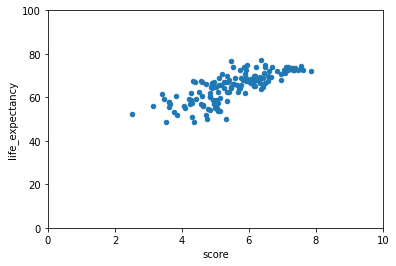

In [71]:
happy_life.plot(kind = 'scatter', x = 'score', y = 'life_expectancy').set(xlim =(0, 10), ylim =(0, 100))

[(2.0, 8.0), (30.0, 80.0)]

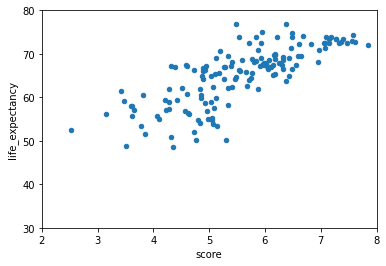

In [72]:
happy_life.plot(kind = 'scatter', x = 'score', y = 'life_expectancy').set(xlim =(2, 8), ylim =(30, 80))

Generally, longer life expectancies are correlated with happier lives